## Step 1 : Load Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load Dataset

In [169]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Country,Age,Salary,Purchased,Year
0,France,44.0,72000.0,No,2000.0
1,Spain,27.0,48000.0,Yes,NaN
2,Germany,30.0,54000.0,No,NaN
3,Spain,38.0,61000.0,No,NaN
4,Germany,40.0,NaN,Yes,NaN


## Step 3 : Get General Information of Dataset

In [170]:
# Information on type of object, column names, data types of each column, memory usage
# non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     11 non-null     float64
 3   Purchased  12 non-null     object 
 4   Year       3 non-null      float64
dtypes: float64(3), object(2)
memory usage: 608.0+ bytes


## Step 4 : Check Data Type and Change If Required

In [171]:
# Change object datatype into category if number 
# of categories are less than 5 percent of the total number of values
cols = dataset.select_dtypes(include='object').columns
for col in cols:
    ratio = len(dataset[col].value_counts()) / len(dataset)
    if ratio < 0.05:
        dataset.loc[:, col] = dataset.loc[:, col].astype('category')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     11 non-null     float64
 3   Purchased  12 non-null     object 
 4   Year       3 non-null      float64
dtypes: float64(3), object(2)
memory usage: 608.0+ bytes


## Step 5 : Missing Data Management

In [176]:
# Percentage of Missing values in each column
nan_percentage = [(clm_names, dataset[clm_names].isna().mean() * 100) for clm_names in dataset]
nan_percentage = pd.DataFrame(nan_percentage, columns = ['columns', 'nan_percentages'])
nan_percentage

,columns,nan_percentages
0,Country,0.000000
1,Age,8.333333
2,Salary,8.333333
3,Purchased,0.000000
4,Year,75.000000


In [177]:
# Set threshold on missing values and if any column crosses that threshold 
# will be removed from dataset
threshold = len(dataset) * 0.7
dataset = dataset.dropna(axis = 1, thresh = threshold)

nan_percentage = [(clm_names, dataset[clm_names].isna().mean() * 100) for clm_names in dataset]
nan_percentage = pd.DataFrame(nan_percentage, columns = ['columns', 'nan_percentages'])
nan_percentage

,columns,nan_percentages
0,Country,0.000000
1,Age,8.333333
2,Salary,8.333333
3,Purchased,0.000000


In [178]:
# Handle missing value 
import warnings
warnings.filterwarnings('ignore')

dataset.Age = dataset.Age.replace(np.NaN, dataset.Age.mode()[0])
dataset.Salary  = dataset.Salary.replace(np.NaN, dataset.Salary.mode()[0])

nan_percentage = [(clm_names, dataset[clm_names].isna().mean() * 100) for clm_names in dataset]
nan_percentage = pd.DataFrame(nan_percentage, columns = ['columns', 'nan_percentages'])
nan_percentage

,columns,nan_percentages
0,Country,0.0
1,Age,0.0
2,Salary,0.0
3,Purchased,0.0


## Step 6 : Check Duplicate Data and Take Action

In [179]:
# Count of duplicate rows
dataset.duplicated().sum()

1

In [180]:
# Drop duplicate rows
dataset = dataset.drop_duplicates()

## Step 7 : Check Outliers and Take Action

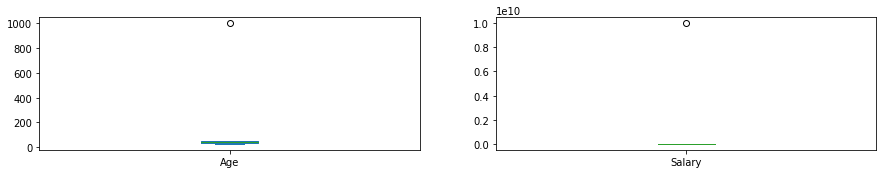

In [181]:
# Using BoxPlot
dataset.plot(kind = 'box',
            subplots = True,
            layout = (7, 2),
            figsize = (15,20))
plt.show()

In [183]:
# Check quantile range for your outliers
low = np.quantile(dataset.Salary, 0)
high = np.quantile(dataset.Salary, 0.95)
dataset[dataset.Salary.between(low, high)]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,83000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,50.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [185]:
# Check quantile range for your outliers
low = np.quantile(dataset.Age, 0)
high = np.quantile(dataset.Age, 0.9)
dataset[dataset.Age.between(low, high)]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,83000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,50.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


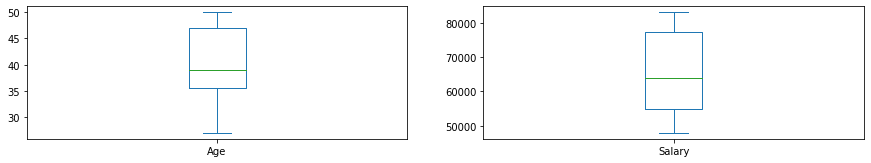

In [186]:
# Make final changes in outliers of dataset
low = np.quantile(dataset.Salary, 0)
high = np.quantile(dataset.Salary, 0.95)
dataset = dataset[dataset.Salary.between(low, high)]

low = np.quantile(dataset.Age, 0)
high = np.quantile(dataset.Age, 0.9)
dataset = dataset[dataset.Age.between(low, high)]

dataset.plot(kind = 'box',
            subplots = True,
            layout = (7, 2),
            figsize = (15,20))
plt.show()

## Step 8 : Matrix Of Features

In [187]:
# Independent and Dependent Features/Variable
X = dataset.loc[:, ['Country', 'Age', 'Salary']]
Y = dataset.iloc[:,-1:]

## Step 9 : Check Imbalanced Dataset and Take Action

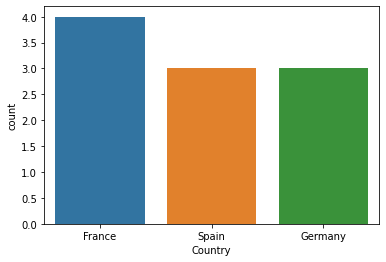

In [188]:
# Using Count Plot
sns.countplot(dataset.Country)
plt.show()

In [189]:
# Check each class weight
from sklearn.utils import compute_class_weight

class_weight = compute_class_weight('balanced', 
                    classes = dataset['Country'].unique() , 
                    y = dataset['Country'])
print("Ratio : {}".format(class_weight))

Ratio : [0.83333333 1.11111111 1.11111111]


## Step 10 : Categorical Data Management

In [190]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

clm_x = ColumnTransformer([("Combine",
                            OneHotEncoder(),[0])], 
                            remainder="passthrough")
X = clm_x.fit_transform(X)

labelencoderY = LabelEncoder()
Y = labelencoderY.fit_transform(Y.values.ravel())

## Step 11 : Splitting Dataset

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                test_size = 0.2,
                                random_state = 0)

## Step 12 : Feature Scaling

In [192]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)